In [11]:
# basic set of imports
import re, operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
import datetime, pickle
import tables # pytables!
%matplotlib inline

In [2]:
data_destinations = pd.read_csv(r"..\expedia_data\destinations.csv")
print("destinations:  " , data_destinations.shape )

destinations:   (62106, 150)


In [3]:
data_destinations.head()


,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [4]:
data_destinations.tail()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
62101,64989,-2.145876,-2.158016,-2.216621,-2.158016,-2.006209,-2.102505,-2.216621,-2.157203,-2.216621,...,-2.216621,-2.158016,-2.158016,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.152024
62102,64990,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.176802,-2.203479,-2.203479,-2.203479,...,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.008885
62103,64991,-2.190567,-2.208308,-2.208308,-2.208308,-2.208308,-2.135493,-2.208308,-2.208308,-1.909808,...,-2.188935,-2.208308,-2.175594,-2.208308,-2.208308,-2.199347,-2.208308,-2.208308,-2.208308,-2.208308
62104,64992,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,...,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686
62105,64993,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,...,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457,-2.179457


In [ ]:
# 62106 rows, 150 columns
# srch_destination_id - 1-64993 (srch_destination_id values skipped)
# d1-d149 149 feature columns

In [21]:
for col in data_destinations.columns:
    print( data_destinations[col].value_counts() )

2047     1
2644     1
8849     1
10896    1
53903    1
55950    1
49805    1
51852    1
62091    1
64138    1
60040    1
37511    1
39558    1
33413    1
35460    1
45699    1
47746    1
41601    1
43648    1
21087    1
23134    1
16989    1
19036    1
29275    1
31322    1
25177    1
27224    1
4695     1
6742     1
12947    1
        ..
46204    1
38072    1
3243     1
60599    1
58550    1
64693    1
62644    1
52403    1
50354    1
56497    1
54448    1
11439    1
9390     1
15533    1
13484    1
1194     1
48253    1
7337     1
5288     1
27815    1
25766    1
31909    1
29860    1
19619    1
17570    1
23713    1
21664    1
44159    1
42110    1
0        1
Name: srch_destination_id, dtype: int64
-2.174115    359
-2.173988    305
-2.174241    302
-2.174366    299
-2.173858    298
-2.173727    234
-2.174610    227
-2.174489    209
-2.173595    205
-2.174730    200
-2.174966    191
-2.174849    180
-2.175082    144
-2.175196    121
-2.173460    117
-2.175309    112
-2.175421     98


In [3]:
d_only = data_destinations.values[:,1:]

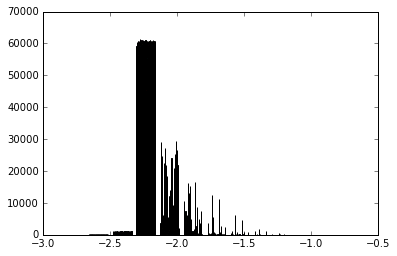

In [46]:
d_only_hist = plt.hist(d_only)
# ugly aggregation of discrete 1-5 star evaluations (thingumy-scale)

In [4]:
d_rows, d_cols = d_only.shape

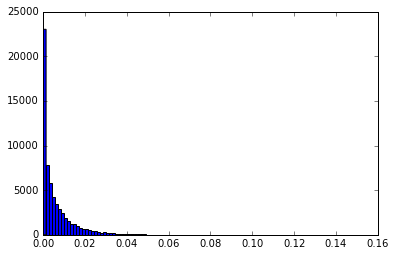

In [5]:
vars_list = []
for row in range(d_rows):
    row_var = np.var( d_only[row,:] )
    vars_list.append( row_var   )
    if row_var==0:
        print(row)
        
plt.hist(vars_list,bins=100)
pass # suppress annoying output

In [10]:
data_destinations.d9.var()

0.039166006575979011

6 0.018442136458
9 0.0391653759444
16 0.0101223751185
37 0.0464718069762
43 0.0146581612628
49 0.02736247269
58 0.0125476118262
93 0.0399625684682
103 0.0115652733729
108 0.0208505917132
139 0.0205569078322


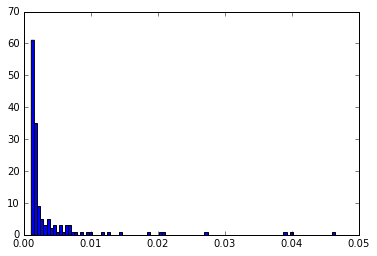

In [11]:
vars_list_cols = []
for col in range(d_cols):
    col_var = np.var( d_only[:,col] )
    vars_list_cols.append( col_var   )
    if col_var>.01:
        print(col+1,col_var)
        
plt.hist(vars_list_cols,bins=100)
pass # suppress annoying output

In [66]:
vars_list_cols

[0.0014880538220736217,
 0.0016863107354257913,
 0.0016073043313871974,
 0.001714439793817759,
 0.0043819310934606068,
 0.018442136457961163,
 0.0015120818076305293,
 0.0013379427413102263,
 0.039165375944372152,
 0.0012723838136338486,
 0.002219983292571762,
 0.0015142984789718102,
 0.002867500691490726,
 0.0059239915003404782,
 0.0015041556573537592,
 0.010122375118523376,
 0.0017699299613058695,
 0.0018058852085745306,
 0.001560990260490845,
 0.0087314572579438917,
 0.0029534983594199605,
 0.0021962323533829759,
 0.0015166055753238479,
 0.0013583973701308406,
 0.0017198671920488058,
 0.0011431268485133177,
 0.0026587014692843552,
 0.0011443206294818355,
 0.0093825710075087932,
 0.0011911915334978972,
 0.0014848450575167252,
 0.0019440952664529208,
 0.0015506524986539224,
 0.0020095979228551865,
 0.0013273076467000254,
 0.0019843781576468229,
 0.046471806976249509,
 0.0019837443151913018,
 0.0015750087547581598,
 0.0012362878025234507,
 0.0017197823417598075,
 0.0014784964775430929,


In [84]:
d_only = np.random.randn(d_rows,d_cols)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


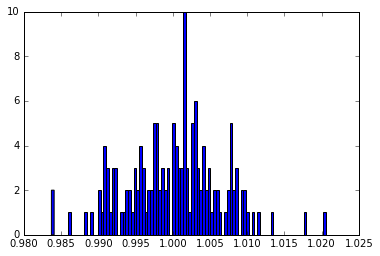

In [86]:
vars_list_cols = []
for col in range(d_cols):
    col_var = np.var( d_only[:,col] )
    vars_list_cols.append( col_var   )
    if col_var>.01:
        print(col)
        
plt.hist(vars_list_cols,bins=100)
pass # suppress annoying output

In [93]:
np.corrcoef(d_only.T)

array([[  1.00000000e+00,  -1.05709753e-03,  -2.29525915e-03, ...,
          1.06159264e-04,  -6.97211483e-03,  -8.85392890e-03],
       [ -1.05709753e-03,   1.00000000e+00,  -1.88110770e-03, ...,
          3.35377159e-03,   5.53925951e-03,   5.37365363e-03],
       [ -2.29525915e-03,  -1.88110770e-03,   1.00000000e+00, ...,
         -1.94130603e-04,   2.45067649e-03,  -7.42671590e-03],
       ..., 
       [  1.06159264e-04,   3.35377159e-03,  -1.94130603e-04, ...,
          1.00000000e+00,  -2.23375892e-03,  -3.97184799e-03],
       [ -6.97211483e-03,   5.53925951e-03,   2.45067649e-03, ...,
         -2.23375892e-03,   1.00000000e+00,  -9.16838809e-03],
       [ -8.85392890e-03,   5.37365363e-03,  -7.42671590e-03, ...,
         -3.97184799e-03,  -9.16838809e-03,   1.00000000e+00]])

In [91]:
np.corrcoef?


In [92]:
d_only.T

array([[-1.85751513,  0.25380913,  0.37925758, ...,  0.01469894,
        -1.26047546,  1.34713787],
       [ 0.43571754, -1.29438089, -1.12709481, ...,  2.87106102,
        -0.07056729,  0.62905284],
       [-1.58270997,  1.11168964,  1.42198196, ...,  0.38830997,
        -0.05874698,  0.10820076],
       ..., 
       [ 0.227563  ,  1.47857713,  1.22782253, ...,  1.68319072,
         0.74911153, -0.92598652],
       [ 0.23255468,  0.8402743 ,  2.61909305, ...,  0.61121114,
        -0.583754  ,  1.41068309],
       [-0.12450253,  0.08037592,  0.97315877, ..., -1.39322315,
         2.91203706, -1.31472977]])

In [3]:
data_destinations.hist(figsize=(200,200),bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB372C24E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DB39CECBE0>]], dtype=object)

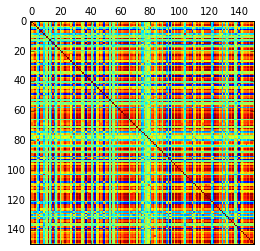

In [5]:
plt.matshow(data_destinations.corr()) # , figsize=(100,100)

In [13]:
def plot_corr(df,size=12,corr_neg_min=.1,corr_pos_min=.2):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    plt.hist(corr.values)
    # upper/lower triangular mask - done!
    masked_corr = np.ma.array (corr, mask= ( (corr<=corr_pos_min) & (corr>=-corr_neg_min) | (corr==1) ) | (np.tril(corr).astype(bool)) )
    cmap = plt.cm.jet
    cmap.set_bad('w',1.)
    #corr[np.absolute(corr)<.1]=0
    fig, ax = plt.subplots(figsize=(size, size))
    ax = ax.matshow(masked_corr)
    fig.colorbar(ax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    col_count = 0
    for col in corr.columns:
        corr_row = corr[col]
        line_str = str(col)
        line_dict = dict()
        row_count = 0
        for el in corr[col]:
            if (el!=1) & ( (el>corr_pos_min) | (el<-corr_neg_min) ) & (col_count>row_count):
                line_str += str(el)
                line_dict[corr.columns[row_count]] = el
            row_count +=1
        def t_abs(x):
            k,v = x
            return(abs(k))
        line_tup = sorted( ((int(100*v),k) for k,v in line_dict.items()), reverse=True, key=t_abs)
        print(col,line_tup)
        col_count +=1
        #print( '{:.3f} {:s}'.format(*line_tup[0]) )
        # print '{:.3f} {:.3f}'.format(*z)
        #print(line_dict)

# plot_corr(titanic)

srch_destination_id []
d1 []
d2 []
d3 []
d4 []
d5 []
d6 [(-70, 'd3'), (-60, 'd1'), (-54, 'd2')]
d7 [(-56, 'd6')]
d8 [(-60, 'd6')]
d9 []
d10 []
d11 []
d12 [(91, 'd3'), (-75, 'd6')]
d13 []
d14 [(-42, 'd12'), (-42, 'd3')]
d15 [(96, 'd12'), (92, 'd3'), (-75, 'd6'), (-43, 'd14')]
d16 [(-50, 'd1'), (-48, 'd15'), (-47, 'd12'), (-46, 'd3')]
d17 []
d18 [(-63, 'd6')]
d19 [(91, 'd15'), (90, 'd12'), (85, 'd3'), (-73, 'd6'), (-46, 'd16'), (-42, 'd14')]
d20 []
d21 []
d22 [(-44, 'd6')]
d23 [(98, 'd15'), (96, 'd12'), (92, 'd3'), (91, 'd19'), (-75, 'd6'), (-48, 'd16'), (-43, 'd14')]
d24 [(-60, 'd6')]
d25 [(-55, 'd6')]
d26 [(83, 'd23'), (83, 'd15'), (81, 'd12'), (-63, 'd6')]
d27 []
d28 [(92, 'd23'), (92, 'd15'), (91, 'd12'), (86, 'd3'), (85, 'd19'), (-69, 'd6'), (-46, 'd16'), (-42, 'd14')]
d29 [(-61, 'd23'), (-60, 'd12'), (-60, 'd28'), (-60, 'd15'), (-58, 'd19'), (-58, 'd3'), (-48, 'd1'), (-44, 'd22'), (-43, 'd26'), (-43, 'd18'), (-42, 'd8'), (-41, 'd25'), (-41, 'd24'), (-41, 'd2')]
d30 [(-41, 'd9')]
d3

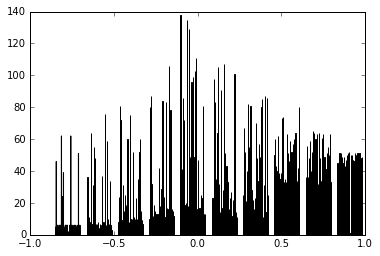

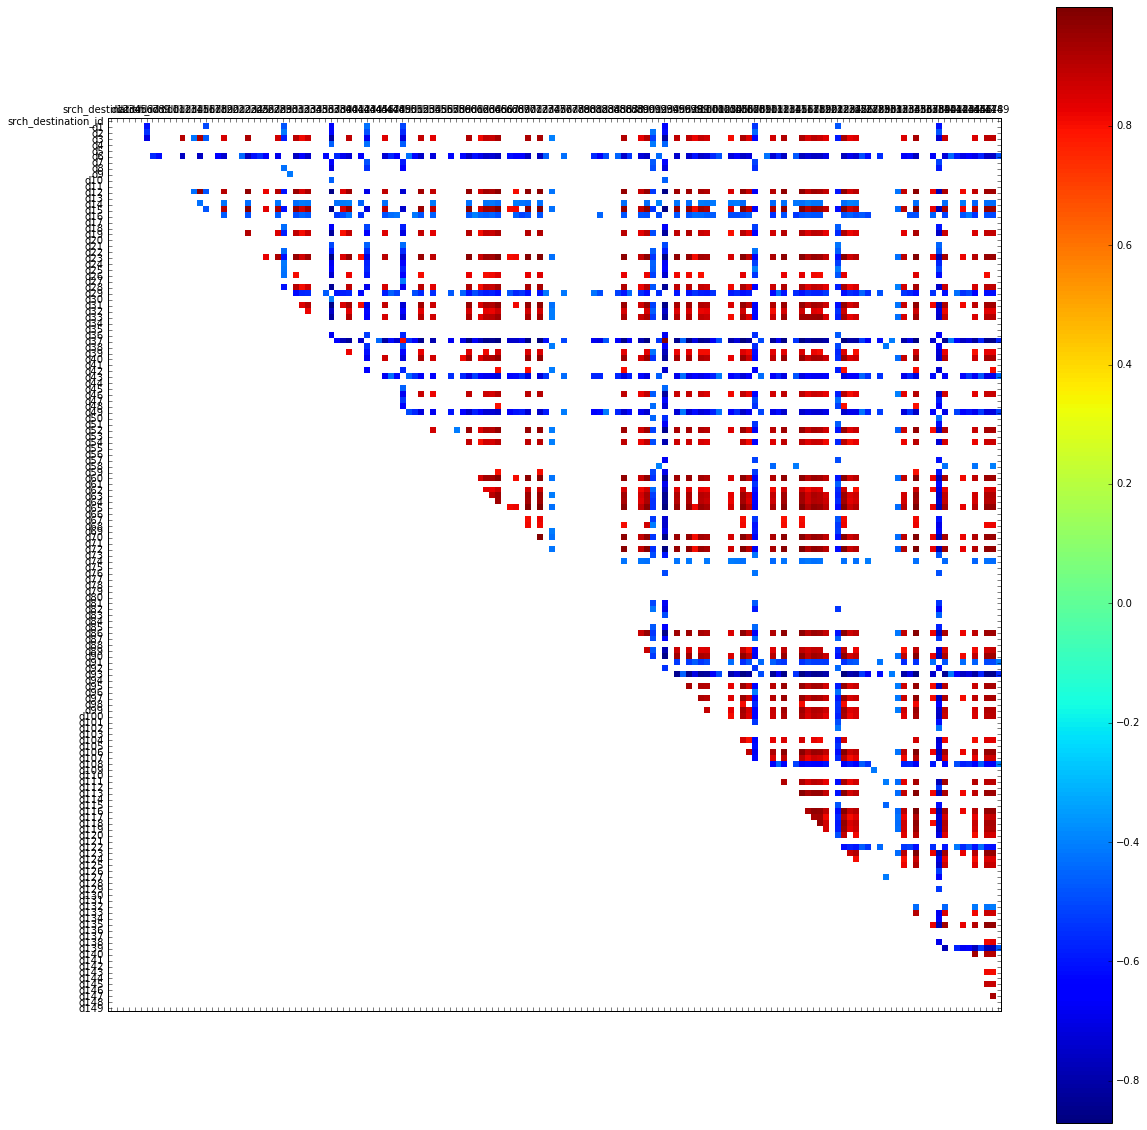

In [16]:
plot_corr(data_destinations, size=20,corr_neg_min=.4,corr_pos_min=.8)

In [3]:
X = data_destinations.values[:,1:]

In [9]:
X

array([[-2.19865709, -2.19865709, -2.19865709, ..., -2.19865709,
        -2.19865709, -2.19865709],
       [-2.18169033, -2.18169033, -2.18169033, ..., -2.18169033,
        -2.18169033, -2.18169033],
       [-2.18348975, -2.22416428, -2.22416428, ..., -2.22416428,
        -2.22416428, -2.057548  ],
       ..., 
       [-2.19056668, -2.20830758, -2.20830758, ..., -2.20830758,
        -2.20830758, -2.20830758],
       [-2.17368617, -2.17368617, -2.17368617, ..., -2.17368617,
        -2.17368617, -2.17368617],
       [-2.17945707, -2.17945707, -2.17945707, ..., -2.17945707,
        -2.17945707, -2.17945707]])

In [4]:
X_std = StandardScaler().fit_transform(X)

In [5]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))
cov_mat = np.cov(X_std.T)

NumPy covariance matrix: 
[[ 1.0000161   0.40762711  0.59538676 ...,  0.63916766  0.67835786
   0.3904938 ]
 [ 0.40762711  1.0000161   0.6089241  ...,  0.6280449   0.62404462
   0.48405102]
 [ 0.59538676  0.6089241   1.0000161  ...,  0.89968488  0.89194104
   0.58747434]
 ..., 
 [ 0.63916766  0.6280449   0.89968488 ...,  1.0000161   0.93150532
   0.60216363]
 [ 0.67835786  0.62404462  0.89194104 ...,  0.93150532  1.0000161
   0.59140292]
 [ 0.3904938   0.48405102  0.58747434 ...,  0.60216363  0.59140292
   1.0000161 ]]


In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.07710217 -0.08852411  0.03174538 ..., -0.02014148  0.00195736
  -0.00349439]
 [-0.07585272  0.03560652 -0.00224    ..., -0.00232844 -0.02215264
  -0.04659787]
 [-0.1060344   0.01434799 -0.00378837 ...,  0.05766262 -0.0076468
  -0.03766956]
 ..., 
 [-0.10993884 -0.0096359  -0.0254154  ...,  0.00752225 -0.01790791
  -0.00027067]
 [-0.10971887 -0.01665926 -0.02695745 ..., -0.01686186  0.00864787
   0.01438409]
 [-0.07236935  0.06989043 -0.00750625 ..., -0.0020143   0.01669732
   0.02945087]]

Eigenvalues 
[  7.66988508e+01   8.28978694e+00   4.21540251e+00   3.46459770e+00
   2.39585525e+00   2.08992832e+00   1.67777976e+00   1.52584624e+00
   1.41050323e+00   1.21472381e+00   1.16535232e+00   1.13951513e+00
   1.11503483e+00   1.07827067e+00   1.05487074e+00   9.77515208e-01
   9.46270238e-01   9.29231117e-01   8.70693143e-01   8.40800061e-01
   8.29966542e-01   8.02423568e-01   7.97239492e-01   7.69907987e-01
   7.40617626e-01   7.11217713e-01   7.13941822e-01   6.845

In [14]:
# X_std.shape
# u,s,v = np.linalg.svd(X_std.T)
# scipy.linalg.svd(X_std.T, overwrite_a=True)
u,s,v = scipy.sparse.linalg.svds(X_std.T)

In [9]:

# ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# Make a list of (eigenvalue, eigenvector) tuples


MemoryError: 

In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

149

Eigenvalues in descending order:
76.6988508088
8.2897869435
4.21540251435
3.46459769995
2.3958552517
2.08992831749
1.67777976381
1.52584623588
1.41050323438
1.21472380968
1.16535231523
1.13951513405
1.11503483439
1.07827067286
1.05487074026
0.977515207712
0.946270238117
0.929231117035
0.870693143373
0.840800060902
0.829966541679
0.802423568404
0.797239492376
0.769907986754
0.740617626454
0.713941821506
0.711217712535
0.684599457003
0.673068652033
0.662624537383
0.634289291894
0.615515987085
0.60455582003
0.598581393914
0.576999380733
0.568590498546
0.561078059594
0.548742634656
0.540766022887
0.522955573346
0.504826934513
0.492520758679
0.483331959464
0.473038814491
0.469350634428
0.457394565674
0.452033592405
0.446996019607
0.440646650433
0.436914113345
0.432088347538
0.421284739691
0.412862082446
0.410639430266
0.397700951448
0.390216717768
0.386188650574
0.380650272478
0.371541534461
0.360919258738
0.353606651576
0.347789912757
0.346727153059
0.342513499307
0.338913754615
0.33050479

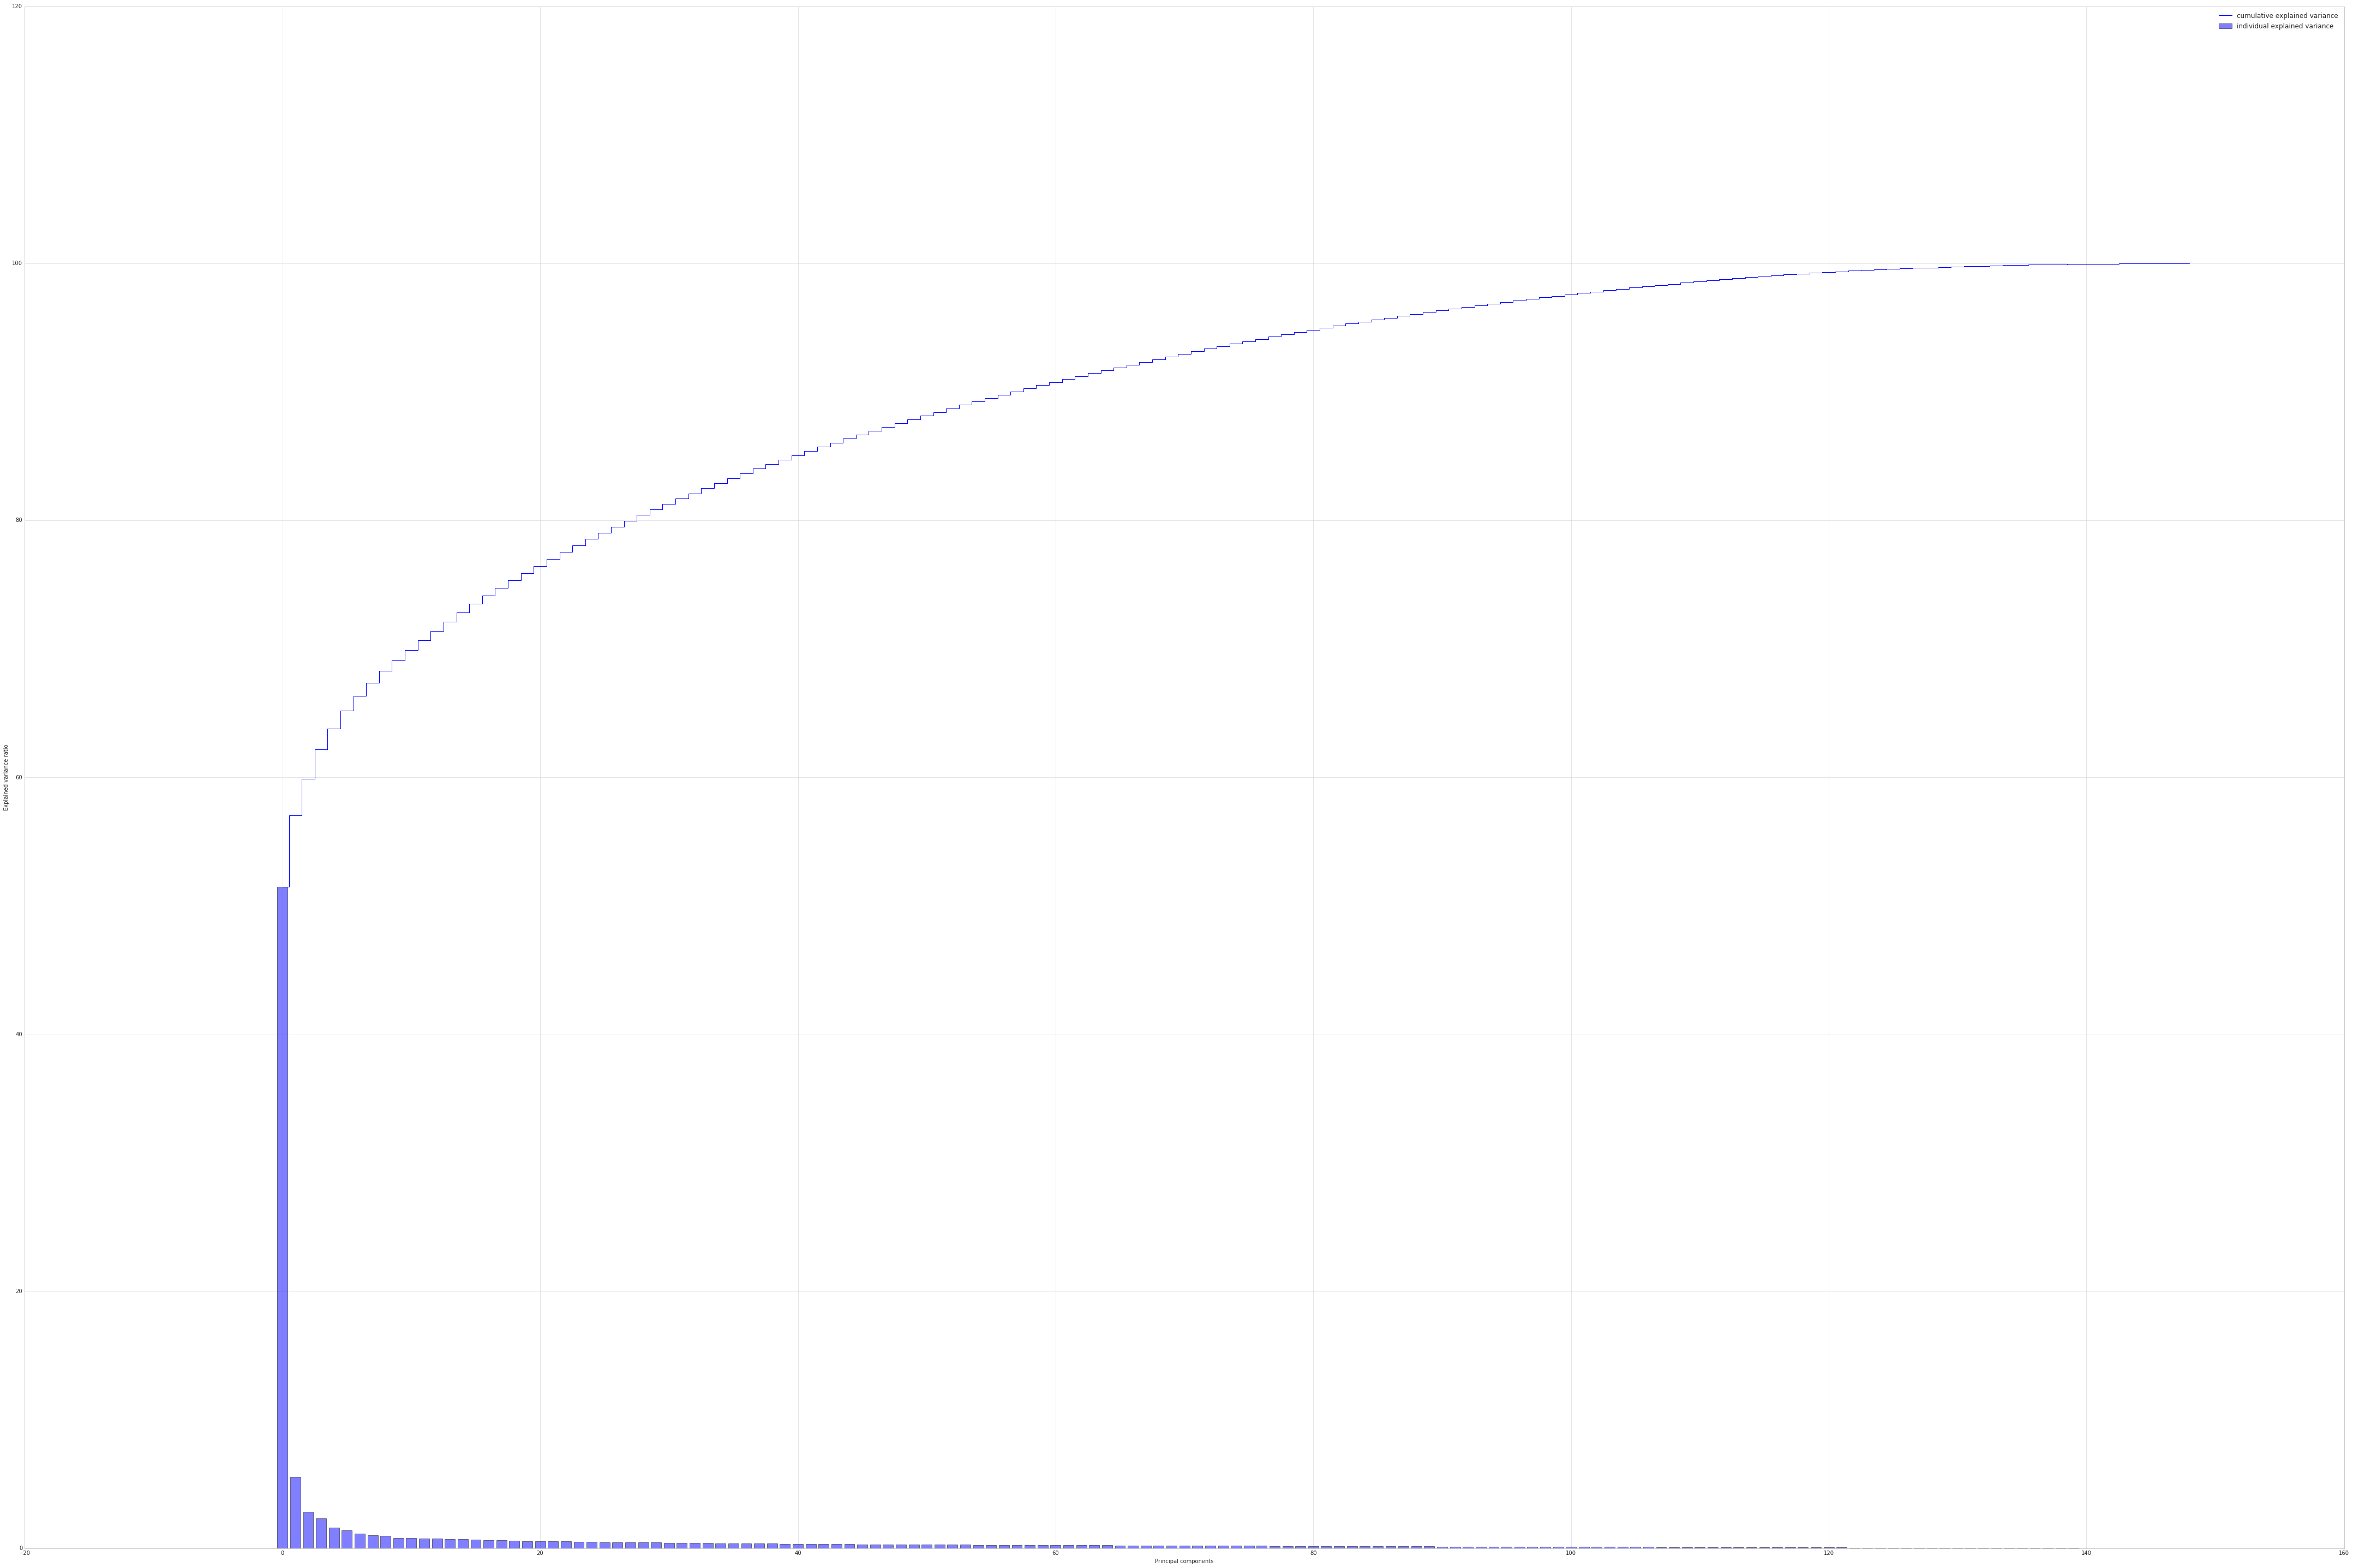

In [21]:


num_predictors = len(X.T)






# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(60, 40))

    plt.bar(range(num_predictors), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(num_predictors), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()  

In [4]:
filename = 'train_as_hdf'
df2 = pd.read_hdf(r"..\expedia_data\{0}.h5".format(filename))
df2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34170293 entries, 0 to 34170292
Data columns (total 24 columns):
date_time                    datetime64[ns]
site_name                    uint8
posa_continent               uint8
user_location_country        uint8
user_location_region         uint16
user_location_city           uint16
orig_destination_distance    float64
user_id                      uint32
is_mobile                    bool
is_package                   bool
channel                      uint8
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt              uint8
srch_children_cnt            uint8
srch_rm_cnt                  uint8
srch_destination_id          uint32
srch_destination_type_id     uint8
is_booking                   bool
cnt                          uint16
hotel_continent              uint8
hotel_country                uint8
hotel_market                 uint16
hotel_cluster                uint8
dtypes: bool(

In [5]:
sum(df2.is_booking)

2722169

In [6]:
df2.shape

(34170293, 24)

In [7]:
2722169/34170293

0.07966478367627694

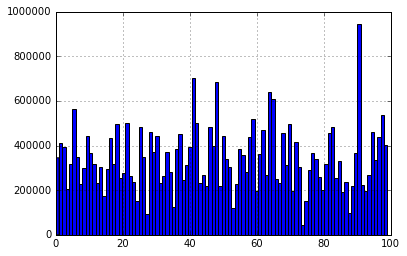

In [9]:
df2.hotel_cluster.hist(bins=100)